# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 72.64,
        "lat": 10.57
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "model",
    "main": {
        "temp": 80.47,
        "feels_like": 82.67,
        "temp_min": 80.47,
        "temp_max": 80.47,
        "pressure": 1010,
        "humidity": 74,
        "sea_level": 1010,
        "grnd_level": 1010
    },
    "wind": {
        "speed": 10.94,
        "deg": 347
    },
    "clouds": {
        "all": 76
    },
    "dt": 1579382865,
    "sys": {
        "country": "IN",
        "sunrise": 1579397525,
        "sunset": 1579439239
    },
    "timezone": 19800,
    "id": 1267390,
    "name": "Kavaratti",
    "cod": 200
}


In [4]:
#Include a print log of each city as it'sbeing processed (with the city number and city name)
# set up lists to hold reponse info
city_name = []
city_number = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    #print(json.dumps(response, indent=4))
    try:
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response['name'])
        city_number.append(response['id'])
        print(f"The city name is : {response['name']} | city number is {response['id']}")
        
    except:
        print("City not found skipping")
        print("------------------------------")        

The city name is : Noumea | number is 2139521
The city name is : Barrow | number is 5880054
The city name is : Bluff | number is 2206939
The city name is : Pimentel | number is 3693584
The city name is : Union | number is 5105640
The city name is : Huambo | number is 3348313
The city name is : Punta Arenas | number is 3874787
The city name is : Mataura | number is 6201424
The city name is : New Norfolk | number is 2155415
The city name is : Townsville | number is 2146142
The city name is : Salalah | number is 286621
The city name is : Dolgoderevenskoye | number is 1507300
City not found skipping
------------------------------
City not found skipping
------------------------------
The city name is : Hong Kong | number is 1819729
The city name is : Fairbanks | number is 5861897
The city name is : Richards Bay | number is 962367
The city name is : Esim | number is 2303611
The city name is : Avarua | number is 4035715
The city name is : Fortuna | number is 5563839
The city name is : Cidrei

The city name is : Necochea | number is 3430443
The city name is : Jejuri | number is 1269087
City not found skipping
------------------------------
The city name is : Fort Nelson | number is 5955902
The city name is : Tazovsky | number is 1489853
City not found skipping
------------------------------
The city name is : Kruisfontein | number is 986717
The city name is : Abong Mbang | number is 2236053
The city name is : Vanavara | number is 2013727
The city name is : Clarksdale | number is 4421935
The city name is : Yangi Marg`ilon | number is 1513491
City not found skipping
------------------------------
The city name is : Onguday | number is 1496130
The city name is : Kavieng | number is 2094342
The city name is : Mugan | number is 1808204
The city name is : Belaya Gora | number is 2126785
The city name is : Vardo | number is 777019
The city name is : Talcahuano | number is 3870282
The city name is : Padang | number is 1633419
The city name is : Yambio | number is 363656
The city nam

The city name is : Chui | number is 3443061
The city name is : Tabas | number is 113659
The city name is : Gladstone | number is 2165478
The city name is : Nelson Bay | number is 2155562
City not found skipping
------------------------------
The city name is : Sun Valley | number is 5513307
The city name is : Nouadhibou | number is 2377457
The city name is : Fallon | number is 5503914
City not found skipping
------------------------------
The city name is : Zaranj | number is 1120985
The city name is : Basco | number is 1726449
The city name is : Phalaborwa | number is 965528
The city name is : Barinas | number is 3648546
The city name is : Pangnirtung | number is 6096551
The city name is : Lata | number is 2738381
The city name is : Payo | number is 1638775
The city name is : Atar | number is 2381334
The city name is : Gamba | number is 2400547
The city name is : Sur | number is 286245
The city name is : Panuco | number is 3521941
The city name is : Nuuk | number is 3421319
The city n

The city name is : Santa Maria da Vitoria | number is 3450063
The city name is : Moundsville | number is 4815462
The city name is : Sao Borja | number is 3449340
The city name is : Cody | number is 5821593
The city name is : Peru | number is 4924733
The city name is : Vitim | number is 2013375
The city name is : Seoul | number is 1835848
The city name is : Bathsheba | number is 3374083
City not found skipping
------------------------------
The city name is : Kralendijk | number is 3513563
The city name is : Sao Felix do Xingu | number is 3388847
The city name is : Esmeraldas | number is 3464008
The city name is : Springfield | number is 4409896
The city name is : Maceio | number is 3395981
The city name is : Nabire | number is 1634614
The city name is : Kholodnyy | number is 2124611
The city name is : Bad Kreuznach | number is 2953416
The city name is : Kinsale | number is 2963155
The city name is : Muros | number is 3115824
The city name is : Sittwe | number is 1295765
The city name i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               549
Country            549
Date               549
Latitude           549
Longitude          549
Max Temperature    549
Humidity           549
Cloudiness         549
Wind Speed         549
dtype: int64

In [6]:
# Display the new data frame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Noumea,NC,1579382710,-22.28,166.46,80.6,65,39,5.82
1,Barrow,US,1579382838,71.29,-156.79,12.2,92,90,16.11
2,Bluff,NZ,1579382866,-46.60,168.33,59.0,94,98,1.01
3,Pimentel,PE,1579382866,-6.84,-79.93,66.2,29,68,18.34
4,Union,US,1579382866,40.63,-74.27,30.2,86,90,5.70


In [7]:
# Export & Save Data Into a .csv.
weather_data.to_csv("./weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

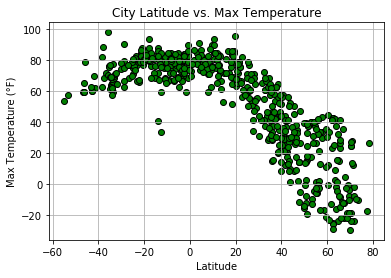

In [16]:
# Scatter Plot for Latitude vs. Temperature 
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="green", marker="o", edgecolor="black")

#graph labels a properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

#### Latitude vs. Humidity Plot

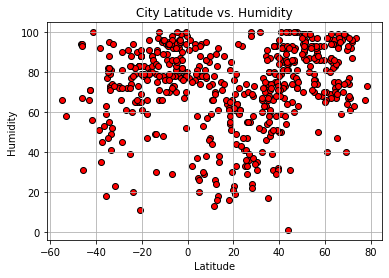

In [17]:
# Scatter Plot for Latitude vs. Humidity 
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="red", marker="o", edgecolor="black")

#graph labels a properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

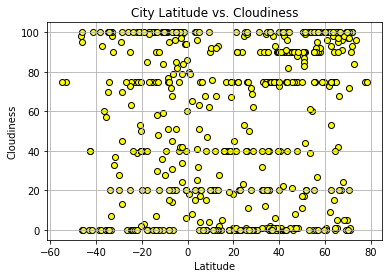

In [19]:
# Scatter Plot for Latitude vs. Cloudiness 
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="yellow", marker="o", edgecolor="black")

#graph labels a properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

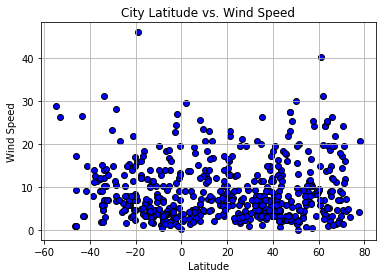

In [18]:
# Scatter Plot for Latitude vs. Cloudiness 
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

#graph labels a properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots


In [9]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression